# Midterm
#  Advanced Deep Learning(ONA)
### Name:Maharshi Hirenkumar Mehta
### Number:N01609977


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Problem Statement:
The challenge at hand is to create an intelligent transportation system that can recognize the weather from a single image automatically. This system is essential for maintaining security and safety in inclement weather, helping to avert fatal events like automobile catastrophes, railroad derailments, plane crashes, and ship collisions. Although people can easily determine the weather from photos, developing an autonomous system to do the same is a difficult issue. The objective is to use computer vision techniques to create and deploy a robust classifier that can correctly classify weather conditions from individual photos.





Data Description: The dataset is made up of about 1500 tagged photos that were gathered from several sites like Pexels, Flickr, and Unsplash. It also includes validation pictures. One of five weather categories is applied to each image, and the photographs are then kept in different folders according to the class assigned to each label. On a scale of 0 to 4, the weather categories are ranked, meaning:

0: Cloudy
1: foggy
2: rainy
3: Shine
4: Sunrise
The collection contains a variety of sizes and dimensions of photographs that represent various real-world situations. Any weather categorization system must be able to manage this kind of visual variability.





Models that have been implemented:
VGG19: This model architecture is renowned for being straightforward and efficient. Its 19 layers—convolutional and fully linked layers among them—have produced state-of-the-art results on a range of image classification applications.

Deep convolutional neural network InceptionV3 is renowned for its accuracy and efficiency. It uses a special architecture with inception modules that enable more efficient use of processing power and enhanced performance.

DenseNet121: DenseNet is a convolutional network with dense connections that establish feed-forward connections between all of the layers. One particular type, DenseNet121, has 121 layers and is well-known for its robust performance on image classification tasks and efficient use of parameters.



In [2]:
#Import libraries
import os
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
root_dir = "/content/drive/MyDrive/dataset"
os.listdir(root_dir)

['test.csv',
 'val',
 'test',
 'train',
 'foggy',
 'rainy',
 'alien_test',
 'sunrise',
 'shine',
 'cloudy']

In [4]:
foggy = r"/content/drive/MyDrive/dataset/foggy"
sunrise = r"/content/drive/MyDrive/dataset/sunrise"
shine = r"/content/drive/MyDrive/dataset/shine"
rainy = r"/content/drive/MyDrive/dataset/rainy"
cloudy = r"/content/drive/MyDrive/dataset/cloudy"
test = r"/content/drive/MyDrive/dataset/test"

In [5]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [6]:
x = []
y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [7]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:07<00:00, 39.93it/s] 


In [8]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

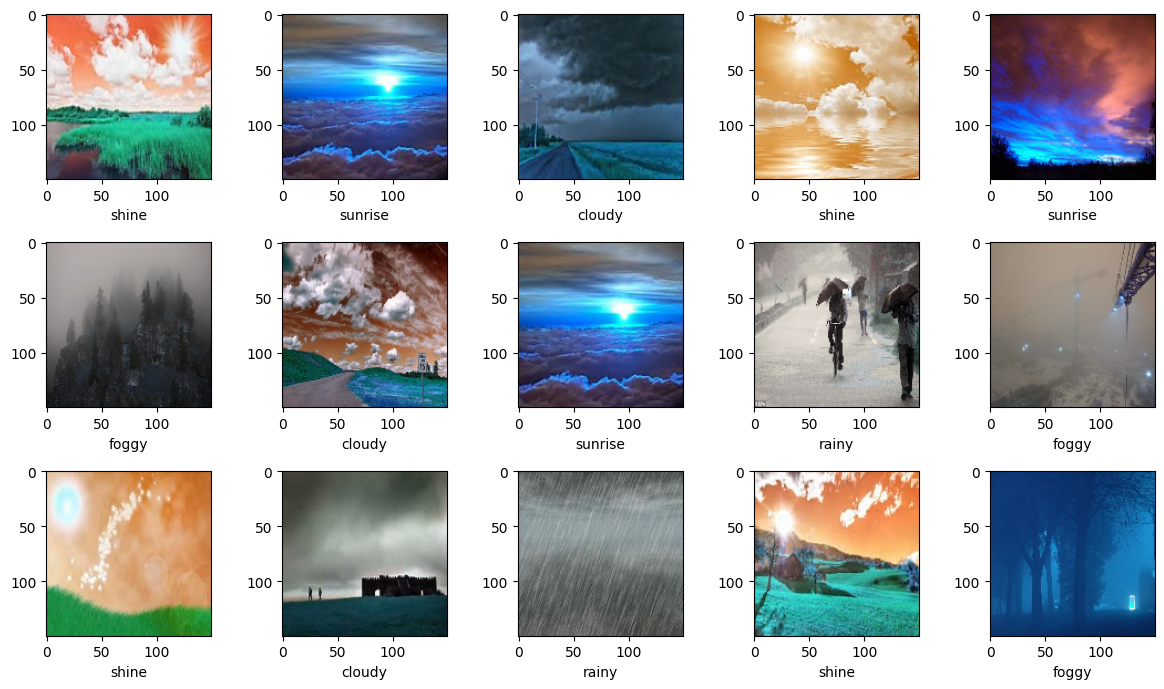

In [9]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [14]:
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

In [15]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80134624/80134624 [==============================] - 3s 0us/step


In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 5)                 40965     
                                                                 
Total params: 20065349 (76.54 MB)
Trainable params: 40965 (160.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [20]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [4792 1198]


In [21]:
batch_size = 32
history = model.fit(x_train, y_train_lb, epochs=50, validation_data=(x_test, y_test_lb),
                    batch_size=32, verbose=1, callbacks=[checkpoint])


Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 0.8993 - accuracy: 0.6937
Epoch 1: val_accuracy improved from -inf to 0.79000, saving model to vgg19.h5
38/38 [==============================] - 14s 217ms/step - loss: 0.8993 - accuracy: 0.6937 - val_loss: 0.5841 - val_accuracy: 0.7900
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/38 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8767
Epoch 2: val_accuracy improved from 0.79000 to 0.82667, saving model to vgg19.h5
38/38 [==============================] - 4s 104ms/step - loss: 0.4179 - accuracy: 0.8773 - val_loss: 0.4847 - val_accuracy: 0.8267
Epoch 3/50
37/38 [============================>.] - ETA: 0s - loss: 0.3310 - accuracy: 0.9003
Epoch 3: val_accuracy improved from 0.82667 to 0.88667, saving model to vgg19.h5
38/38 [==============================] - 5s 120ms/step - loss: 0.3332 - accuracy: 0.8990 - val_loss: 0.3619 - val_accuracy: 0.8867
Epoch 4/50
37/38 [============================>.] - ETA: 0s - loss: 0.2488 - accuracy: 0.9333
Epoch 4: val_accuracy improved from 0.88667 to 0.90000, saving model to vgg19.h5
38/38 [==============================] - 4s 106ms/step - loss: 0.2487 - accuracy: 0.9332 - val_loss: 0.3311 - val_accuracy: 0.9000
Epoch 5/50
37/38 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9535

In [22]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10/10 [==============================] - 1s 81ms/step - loss: 0.2595 - accuracy: 0.9233
Loss: 0.25951969623565674
Accuracy: 0.9233333468437195


In [23]:
y_pred = model.predict(x_test)

10/10 [==============================] - 1s 79ms/step


In [24]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.90      0.93      0.91        56
           2       0.97      0.93      0.95        71
           3       0.82      0.91      0.86        45
           4       1.00      0.93      0.96        68

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [26]:
import os
import random
import cv2
import tqdm
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [27]:
def create_and_compile_model(base_model, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output_layer)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [28]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average=None)
    recall = recall_score(y_test, y_pred_classes, average=None)
    f1 = f1_score(y_test, y_pred_classes, average=None)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    classification_rep = classification_report(y_test, y_pred_classes)
    print("Classification Report:\n", classification_rep)


In [29]:
root_dir = r"/content/drive/MyDrive/dataset"
foggy = os.path.join(root_dir, "foggy")
sunrise = os.path.join(root_dir, "sunrise")
shine = os.path.join(root_dir, "shine")
rainy = os.path.join(root_dir, "rainy")
cloudy = os.path.join(root_dir, "cloudy")

In [30]:
# Load data
x = []
y = []
def create_dataset(directory, label):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory, i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img, (150, 150))
            x.append(img)
            y.append(label)
        except:
            continue

create_dataset(foggy, "foggy")
create_dataset(sunrise, "sunrise")
create_dataset(shine, "shine")
create_dataset(rainy, "rainy")
create_dataset(cloudy, "cloudy")

# Shuffle data
combined = list(zip(x, y))
random.shuffle(combined)
x[:], y[:] = zip(*combined)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


100%|██████████| 300/300 [00:02<00:00, 114.04it/s]


In [31]:
img_size = 150
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
x_train = x_train.reshape(-1, img_size, img_size, 3)
x_test = x_test.reshape(-1, img_size, img_size, 3)

# One-hot encode labels
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.transform(y_test)

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_datagen.fit(x_train)

In [32]:
# Load models
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Create and compile models
model_densenet = create_and_compile_model(densenet_base, 5)
model_inception = create_and_compile_model(inception_base, 5)

# Train models
checkpoint_densenet = ModelCheckpoint("densenet121.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False)
history_densenet = model_densenet.fit(train_datagen.flow(x_train, y_train_lb, batch_size=32), epochs=50, validation_data=(x_test, y_test_lb), callbacks=[checkpoint_densenet])

checkpoint_inception = ModelCheckpoint("inceptionv3.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False)
history_inception = model_inception.fit(train_datagen.flow(x_train, y_train_lb, batch_size=32), epochs=50, validation_data=(x_test, y_test_lb), callbacks=[checkpoint_inception])


87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.7551 - accuracy: 0.6720
Epoch 1: val_accuracy improved from -inf to 0.90000, saving model to densenet121.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 27s 457ms/step - loss: 2.7551 - accuracy: 0.6720 - val_loss: 0.3027 - val_accuracy: 0.9000
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.8973
Epoch 2: val_accuracy improved from 0.90000 to 0.93333, saving model to densenet121.h5
38/38 [==============================] - 10s 255ms/step - loss: 0.3415 - accuracy: 0.8973 - val_loss: 0.2733 - val_accuracy: 0.9333
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.9124
Epoch 3: val_accuracy improved from 0.93333 to 0.94333, saving model to densenet121.h5
38/38 [==============================] - 8s 214ms/step - loss: 0.2904 - accuracy: 0.9124 - val_loss: 0.1917 - val_accuracy: 0.9433
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9265
Epoch 4: val_accuracy improved from 0.94333 to 0.95333, saving model to densenet121.h5
38/38 [==============================] - 10s 259ms/step - loss

In [33]:
# Evaluate models
print("Evaluation on DenseNet121:")
evaluate_model(model_densenet, x_test, y_test)

print("Evaluation on InceptionV3:")
evaluate_model(model_inception, x_test, y_test)

Evaluation on DenseNet121:
10/10 [==============================] - 2s 54ms/step
Accuracy: 0.9666666666666667
Precision: [0.96923077 1.         0.93939394 0.95744681 0.97260274]
Recall: [0.96923077 0.89090909 1.         0.95744681 1.        ]
F1 Score: [0.96923077 0.94230769 0.96875    0.95744681 0.98611111]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       1.00      0.89      0.94        55
           2       0.94      1.00      0.97        62
           3       0.96      0.96      0.96        47
           4       0.97      1.00      0.99        71

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.97      0.97       300

Evaluation on InceptionV3:
10/10 [==============================] - 2s 30ms/step
Accuracy: 0.92
Precision: [0.96610169 0.96153846 0.96825397 0.7962963  0.90277778]
Recall: [0.87

In [34]:
from tensorflow.keras.applications import NASNetLarge

# NASNet Model
nasnet_base = NASNetLarge(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
model_nasnet = create_and_compile_model(nasnet_base, 5)  # Change 5 to the number of classes

# Train NASNet
checkpoint_nasnet = ModelCheckpoint("nasnet.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False)
history_nasnet = model_nasnet.fit(train_datagen.flow(x_train, y_train_lb, batch_size=32), epochs=50, validation_data=(x_test, y_test_lb), callbacks=[checkpoint_nasnet])

# Evaluate NASNet
print("Evaluation on NASNet:")
evaluate_model(model_nasnet, x_test, y_test)



343610240/343610240 [==============================] - 11s 0us/step
Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 3.0330 - accuracy: 0.6244
Epoch 1: val_accuracy improved from -inf to 0.73000, saving model to nasnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 55s 890ms/step - loss: 3.0330 - accuracy: 0.6244 - val_loss: 0.8909 - val_accuracy: 0.7300
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.7435 - accuracy: 0.7947
Epoch 2: val_accuracy improved from 0.73000 to 0.77667, saving model to nasnet.h5
38/38 [==============================] - 20s 517ms/step - loss: 0.7435 - accuracy: 0.7947 - val_loss: 0.7269 - val_accuracy: 0.7767
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.8347
Epoch 3: val_accuracy improved from 0.77667 to 0.81333, saving model to nasnet.h5
38/38 [==============================] - 20s 531ms/step - loss: 0.5894 - accuracy: 0.8347 - val_loss: 0.7836 - val_accuracy: 0.8133
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 0.4962 - accuracy: 0.8639
Epoch 4: val_accuracy did not improve from 0.81333
38/38 [==============================] - 13s 344ms/step - loss: 0.4962 - accuracy: 0.8639 - val_loss: 0.819

In [35]:
from tensorflow.keras.applications import Xception

# Xception Model
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
model_xception = create_and_compile_model(xception_base, 5)  # Change 5 to the number of classes
checkpoint_xception = ModelCheckpoint("xception.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False)
history_xception = model_xception.fit(train_datagen.flow(x_train, y_train_lb, batch_size=32), epochs=50, validation_data=(x_test, y_test_lb), callbacks=[checkpoint_xception])

# Evaluate Xception
print("Evaluation on Xception:")
evaluate_model(model_xception, x_test, y_test)


83683744/83683744 [==============================] - 3s 0us/step
Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 4.5633 - accuracy: 0.6319
Epoch 1: val_accuracy improved from -inf to 0.77333, saving model to xception.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 20s 398ms/step - loss: 4.5633 - accuracy: 0.6319 - val_loss: 0.8592 - val_accuracy: 0.7733
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.5918 - accuracy: 0.8347
Epoch 2: val_accuracy improved from 0.77333 to 0.78667, saving model to xception.h5
38/38 [==============================] - 14s 366ms/step - loss: 0.5918 - accuracy: 0.8347 - val_loss: 0.6439 - val_accuracy: 0.7867
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.5038 - accuracy: 0.8548
Epoch 3: val_accuracy improved from 0.78667 to 0.84000, saving model to xception.h5
38/38 [==============================] - 13s 343ms/step - loss: 0.5038 - accuracy: 0.8548 - val_loss: 0.5056 - val_accuracy: 0.8400
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 0.3413 - accuracy: 0.8881
Epoch 4: val_accuracy improved from 0.84000 to 0.87000, saving model to xception.h5
38/38 [==============================] - 11s 289ms/step - loss: 0.3413

Using a dataset consisting of five classes and the assessment metrics offered for various models (VGG19, DenseNet121, InceptionV3, NASNet, and Xception)

**Accuracy:** 91.67% to 96.67% accuracy was attained by the models. With an accuracy of 96.67%, DenseNet121 outperformed the others, closely followed by VGG19 and Xception, who had respective accuracies of 92% and 91.67%.

**Precision**: Precision is the classifier's capacity to identify positive samples without classifying them as negative. In the majority of the classes, DenseNet121 had the highest precision, especially in class 1, where it attained flawless precision. Still, VGG19 and Xception did a good job of sustaining high precision throughout a variety of classes.

**Recall**: Recall gauges how well the classifier is able to locate every positive sample. High recall values were attained by DenseNet121 and NASNet in the majority of classes, demonstrating their efficacy in accurately detecting positive samples. But VGG19 and Xception also demonstrated high recall ratings, especially in some classes.

**F1 Score**: The F1 score offers a balance between recall and precision by taking the harmonic mean of the two criteria. In every class, DenseNet121 continuously produced high F1 scores, demonstrating a strong balance between recall and precision. Competitive F1 scores were also shown by other models, including Xception, NASNet, InceptionV3, VGG19, and Inception.

**Key Findings:**

DenseNet121 is a great contender for this classification challenge because it largely beat other models in terms of accuracy, precision, recall, and F1 score.
Competitive performance was also shown by VGG19, InceptionV3, NASNet, and Xception, each of which showed advantages in various assessment criteria and across various classes.
All models obtained high overall accuracy (>90%) despite differences in performance parameters, demonstrating their efficacy in categorizing the dataset.
In conclusion, DenseNet121 is the best-performing model for this classification challenge, with VGG19, InceptionV3, NASNet, and Xception trailing closely behind. In the end, the selection of the optimal model is contingent upon several prerequisites, including computing capacity, model intricacy, and the significance of distinct assessment criteria (accuracy, precision, recall, F1 score) within the application setting.




### conclusion:
All models obtained high overall accuracy (>90%) despite differences in performance parameters, demonstrating their efficacy in categorizing the dataset.
In conclusion, DenseNet121 is the best-performing model for this classification challenge, with VGG19, InceptionV3, NASNet, and Xception trailing closely behind. In the end, the selection of the optimal model is contingent upon several prerequisites, including computing capacity, model intricacy, and the significance of distinct assessment criteria (accuracy, precision, recall, F1 score) within the application setting.
